In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import tempfile

In [2]:
def compress_image(image, quality):
    # Compress the image and return it
    # Using a temporary file to handle the compression
    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.jpg').name
    cv2.imwrite(temp_file, image, [int(cv2.IMWRITE_JPEG_QUALITY), quality])
    compressed_image = cv2.imread(temp_file)
    os.remove(temp_file)  # Clean up the temporary file
    return compressed_image

In [3]:
def apply_gaussian_filter(image):
    # Apply a Gaussian blur to the image
    filtered_image = cv2.GaussianBlur(image, (15, 15), 4)
    return filtered_image

In [4]:
def plot_histogram(image, title, position):
    # Convert image to grayscale for histogram
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.subplot(position)
    plt.hist(gray_image.ravel(), 256, [0, 256])
    plt.title(title)# File path for the original image

In [5]:
def plot_combined_histogram(image1, image2, title1, title2):
    # Convert images to grayscale
    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Plot histograms
    plt.hist(gray_image1.ravel(), 256, [0, 256], color='blue', alpha=0.5, label=title1)
    plt.hist(gray_image2.ravel(), 256, [0, 256], color='red', alpha=0.5, label=title2)

    # Add legend and title
    plt.legend()
    plt.title(f'Histogram Comparison: {title1} & {title2}')

In [6]:
# File path for the original image
input_path = 'img.jpg'  # Replace with your original image path

In [7]:
# Load the original image
original_image = cv2.imread(input_path)

# Compress the original image
compressed_image = compress_image(original_image, 50)

# Apply Gaussian filtering to the original image
filtered_image = apply_gaussian_filter(original_image)

# Compress the filtered image
compressed_filtered_image = compress_image(filtered_image, 50)

In [8]:
# Convert images to RGB for displaying
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
compressed_image_rgb = cv2.cvtColor(compressed_image, cv2.COLOR_BGR2RGB)
filtered_image_rgb = cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB)
compressed_filtered_image_rgb = cv2.cvtColor(compressed_filtered_image, cv2.COLOR_BGR2RGB)

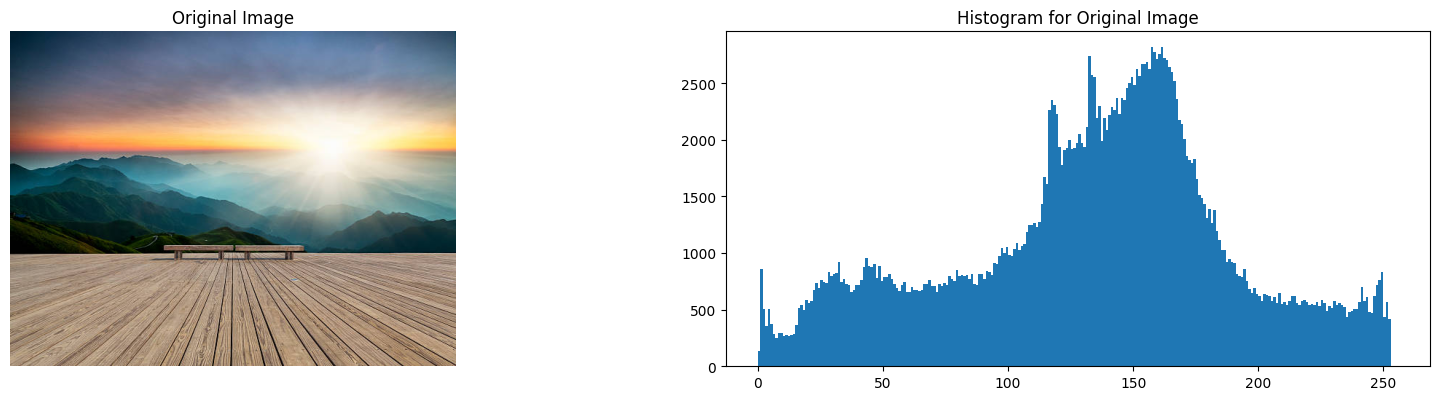

In [9]:
# Display the images and their histograms
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed

# Original image
plt.subplot(4, 2, 1)
plt.imshow(original_image_rgb)
plt.title('Original Image')
plt.axis('off')

# Histogram for the original image
plot_histogram(original_image, 'Histogram for Original Image', 422)

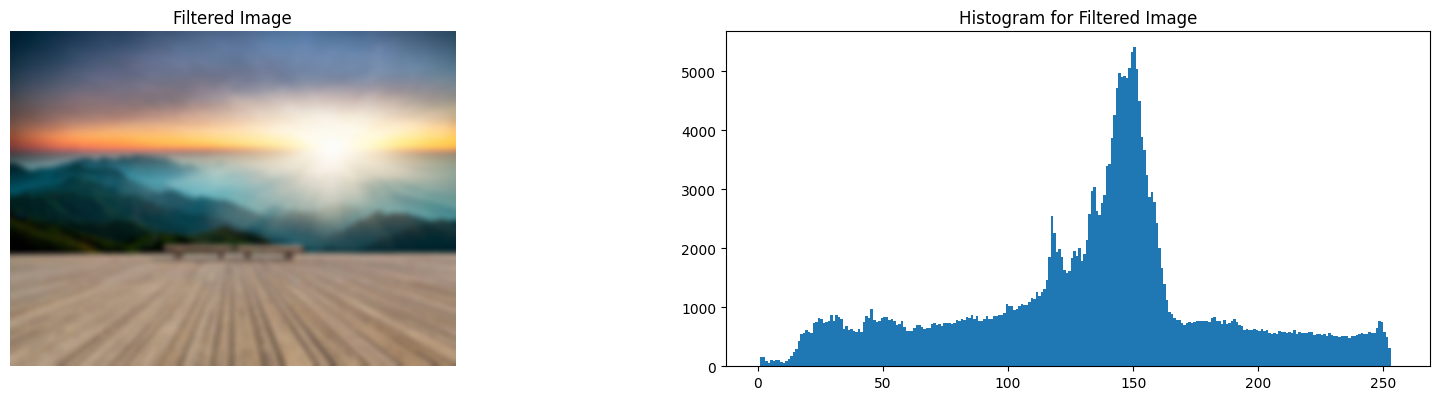

In [10]:
# Display the images and their histograms
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed

# Filtered image
plt.subplot(4, 2, 5)
plt.imshow(filtered_image_rgb)
plt.title('Filtered Image')
plt.axis('off')

# Histogram for the filtered image
plot_histogram(filtered_image, 'Histogram for Filtered Image', 426)


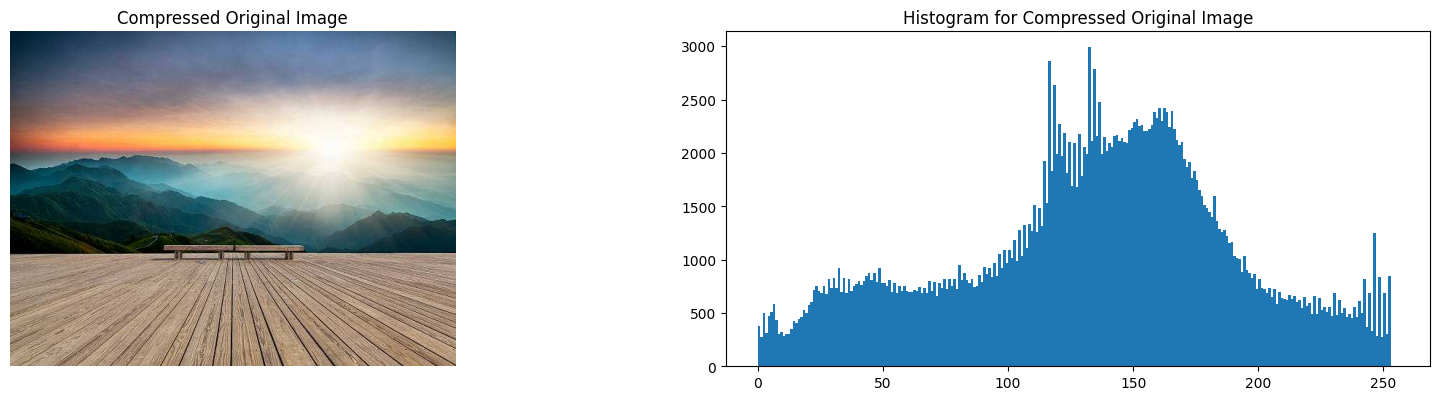

In [11]:
# Display the images and their histograms
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed

# Compressed original image
plt.subplot(4, 2, 3)
plt.imshow(compressed_image_rgb)
plt.title('Compressed Original Image')
plt.axis('off')

# Histogram for the compressed original image
plot_histogram(compressed_image, 'Histogram for Compressed Original Image', 424)

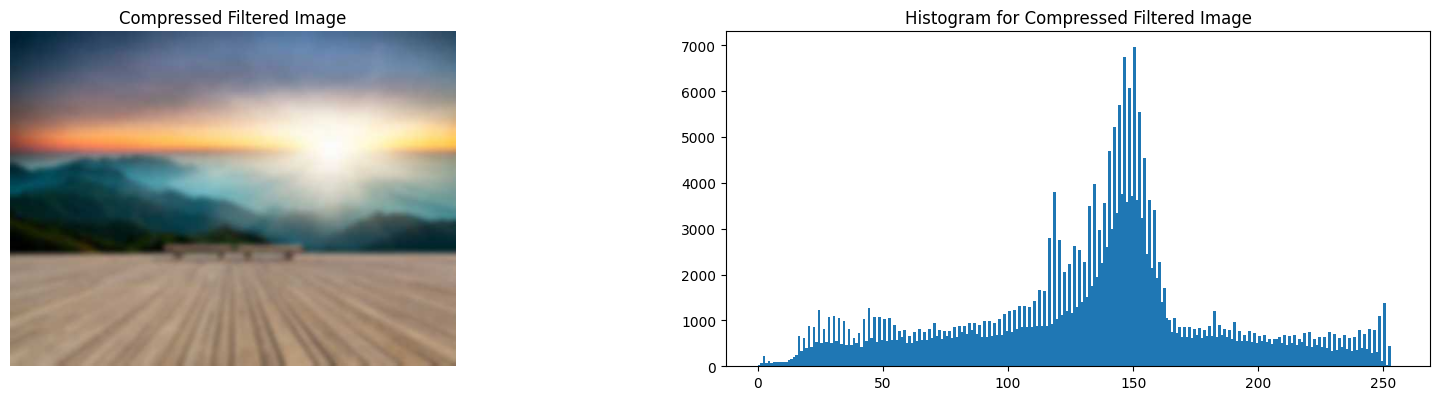

In [12]:
# Display the images and their histograms
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed

# Compressed filtered image
plt.subplot(4, 2, 7)
plt.imshow(compressed_filtered_image_rgb)
plt.title('Compressed Filtered Image')
plt.axis('off')

# Histogram for the compressed filtered image
plot_histogram(compressed_filtered_image, 'Histogram for Compressed Filtered Image', 428)

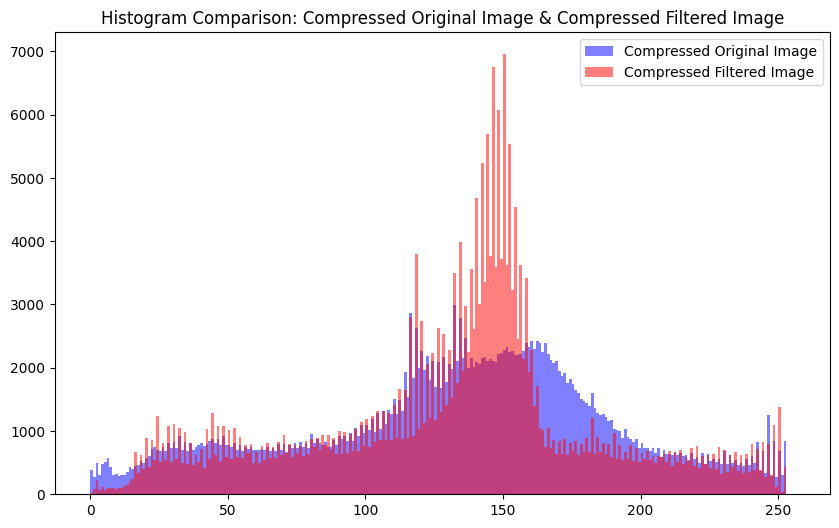

In [13]:
# Plot the combined histogram
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plot_combined_histogram(compressed_image, compressed_filtered_image, 'Compressed Original Image', 'Compressed Filtered Image')
plt.show()

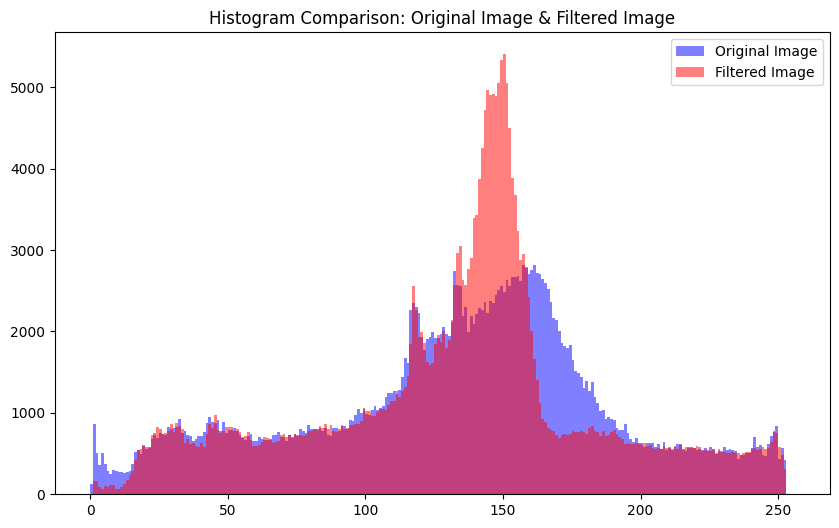

In [14]:
# Plot the combined histogram
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plot_combined_histogram(original_image, filtered_image, 'Original Image', 'Filtered Image')
plt.show()